In [1]:
import pandas as pd

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'

In [3]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

In [4]:
pima = pd.read_csv(url,header=None, names=col_names)

In [5]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']
X = pima[feature_cols]
y = pima.label

In [7]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
y_pred_class = logreg.predict(X_test)

In [10]:
from sklearn import metrics

In [11]:
metrics.accuracy_score(y_test, y_pred_class)

0.69270833333333337

In [12]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
confusion

array([[118,  12],
       [ 47,  15]])

In [13]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

### Classification Accuracy: Overall, how often is the classifier correct?

In [14]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.692708333333
0.692708333333


### Classification Error: Overall, how often is the classifier incorrect?

In [15]:
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.307291666667
0.307291666667


### Sensitivity: When the actual value is positive, how often is the prediction correct? or Recall

In [16]:
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.241935483871
0.241935483871


### Specificity: When the actual value is negative, how often is the prediction correct?

In [17]:
print(TN / float(TN + FP))

0.907692307692


### False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [18]:
print(FP / float(TN + FP))

0.0923076923077


### Precision: When a positive value is predicted, how often is the prediction correct?

In [19]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred_class))

0.555555555556
0.555555555556


In [20]:
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [21]:
logreg.predict_proba(X_test)[0:10, :]

array([[ 0.63247571,  0.36752429],
       [ 0.71643656,  0.28356344],
       [ 0.71104114,  0.28895886],
       [ 0.5858938 ,  0.4141062 ],
       [ 0.84103973,  0.15896027],
       [ 0.82934844,  0.17065156],
       [ 0.50110974,  0.49889026],
       [ 0.48658459,  0.51341541],
       [ 0.72321388,  0.27678612],
       [ 0.32810562,  0.67189438]])

In [22]:
logreg.predict_proba(X_test)[0:10, 1]

array([ 0.36752429,  0.28356344,  0.28895886,  0.4141062 ,  0.15896027,
        0.17065156,  0.49889026,  0.51341541,  0.27678612,  0.67189438])

In [23]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

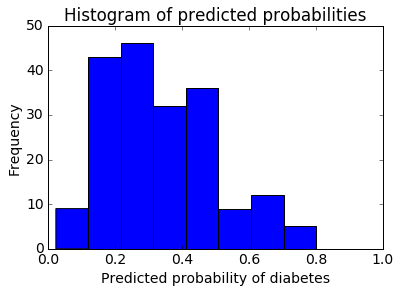

In [25]:
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')
plt.show()

## ROC Curves and Area Under the Curve (AUC)

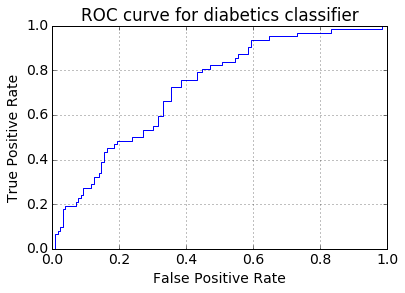

In [27]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetics classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

In [28]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [29]:
evaluate_threshold(0.5)

('Sensitivity:', 0.24193548387096775)
('Specificity:', 0.90769230769230769)


In [30]:
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.724565756824


In [31]:
from sklearn.cross_validation import cross_val_score

In [32]:
cross_val_score(logreg, X, y, cv = 10, scoring='roc_auc').mean()

0.73782336182336183